In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


In [2]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:1:2
# Load the dataset
data_url = 'https://raw.githubusercontent.com/huy164/datasets/master/walmart_stock_price.csv'
df = pd.read_csv(data_url)
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [4]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=13084.534, Time=5.59 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13157.943, Time=0.81 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13159.838, Time=2.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13159.823, Time=0.98 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13156.954, Time=0.23 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=13082.177, Time=5.00 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=13124.315, Time=1.58 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=13102.871, Time=4.20 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=13084.146, Time=6.72 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=13101.617, Time=2.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=13082.205, Time=4.78 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=13075.704, Time=13.48 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=13072.803, Time=15.24 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=13077.784, Time=10.12 sec
 ARIMA(4,1,3)(0,

ARIMA(order=(4, 1, 5), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [5]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [6]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[48.35377296 48.30914048 48.25603791 48.25170059 48.26839789 48.25205847
 48.21900354 48.22197436 48.24426644 48.23767174 48.2120586  48.21443552
 48.23596435 48.23385763 48.2123853  48.21274912 48.2319786  48.23254397
 48.21423544 48.21271096 48.22937347 48.23173939 48.21618376 48.21320177
 48.22738102 48.23098338 48.21789973 48.21389452 48.22578025 48.23019488]


In [7]:
# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)


Validation RMSE: 69.05467788140271
Testing RMSE: 18.46636499711636


Validation RMSE: 69.05467788140271
Testing RMSE: 18.46636499711636


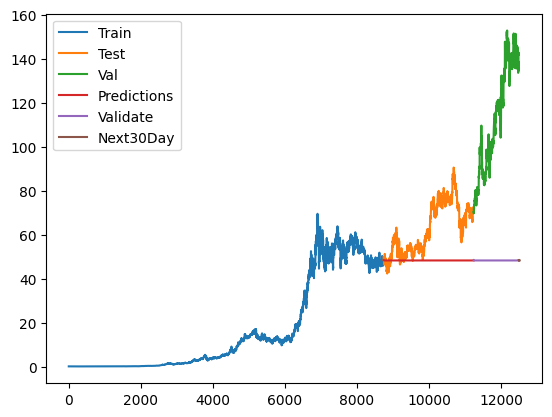

In [11]:
# 8. Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test','Val', 'Predictions','Validate','Next30Day'])
plt.show()